In [43]:
# upbit 다운로드 해야함
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
import pyupbit

pyupbit.get_tickers(fiat='KRW')

['KRW-BTC',
 'KRW-ETH',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-OMG',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-REP',
 'KRW-ADA',
 'KRW-SBD',
 'KRW-POWR',
 'KRW-BTG',
 'KRW-ICX',
 'KRW-EOS',
 'KRW-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLYX',
 'KRW-ZRX',
 'KRW-LOOM',
 'KRW-BCH',
 'KRW-BAT',
 'KRW-IOST',
 'KRW-RFR',
 'KRW-CVC',
 'KRW-IQ',
 'KRW-IOTA',
 'KRW-HIFI',
 'KRW-ONG',
 'KRW-GAS',
 'KRW-UPP',
 'KRW-ELF',
 'KRW-KNC',
 'KRW-BSV',
 'KRW-THETA',
 'KRW-QKC',
 'KRW-BTT',
 'KRW-MOC',
 'KRW-ENJ',
 'KRW-TFUEL',
 'KRW-MANA',
 'KRW-ANKR',
 'KRW-AERGO',
 'KRW-ATOM',
 'KRW-TT',
 'KRW-CRE',
 'KRW-MBL',
 'KRW-WAXP',
 'KRW-HBAR',
 'KRW-MED',
 'KRW-MLK',
 'KRW-STPT',
 'KRW-ORBS',
 'KRW-VET',
 'KRW-CHZ',
 'KRW-STMX',
 'KRW-DKA',
 'KRW-HIVE',
 'KRW-KAVA',
 'KRW-AHT',
 'KRW-LINK',
 'KRW-XTZ',
 'KRW-BORA',
 'KRW-JST',
 'KRW-CRO',
 'KRW-TON',
 'KRW-SXP',
 'KRW-HUNT',
 'KRW-PLA

In [44]:
pyupbit.get_current_price(["KRW-BTC", "KRW-XRP"])
#한국돈으로 나옴

{'KRW-BTC': 21675000, 'KRW-XRP': 441}

In [45]:
ticker = 'KRW-XRP'
interval = 'day1'
to = '2021-05-01'
count = 150
pyupbit.get_ohlcv(ticker=ticker, interval=interval, to=to, count=count)

#ticker =티커
#interval = 한 봉의 길이
#to = 데이터의 마지막 시점
#count = 몇 개 봉을 받을지

,open,high,low,close,volume,value
2020-12-02 09:00:00,681.0,697.0,661.0,691.0,2.667772e+08,1.810106e+11
2020-12-03 09:00:00,691.0,699.0,675.0,687.0,1.691946e+08,1.159385e+11
2020-12-04 09:00:00,687.0,691.0,597.0,612.0,3.917773e+08,2.529192e+11
2020-12-05 09:00:00,612.0,653.0,603.0,635.0,2.657935e+08,1.679050e+11
2020-12-06 09:00:00,635.0,681.0,632.0,673.0,3.697689e+08,2.439652e+11
...,...,...,...,...,...,...
2021-04-26 09:00:00,1265.0,1630.0,1230.0,1615.0,1.658184e+09,2.380035e+12
2021-04-27 09:00:00,1615.0,1750.0,1575.0,1650.0,1.479054e+09,2.452518e+12
2021-04-28 09:00:00,1650.0,1705.0,1515.0,1590.0,1.158910e+09,1.844430e+12
2021-04-29 09:00:00,1585.0,1680.0,1530.0,1660.0,7.731728e+08,1.260705e+12


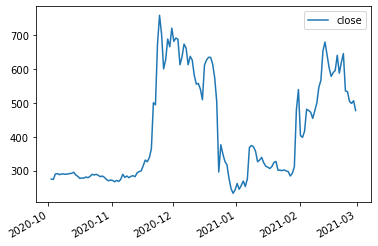

In [46]:
a=pyupbit.get_ohlcv("KRW-XRP", to="20210301",interval="day",count=150)
a[["close"]].plot()
plt.show()

# ACF 함수 사용해보기

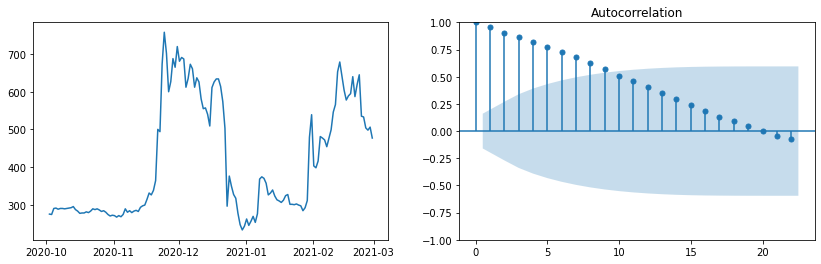

In [47]:

fig,(ax1,ax2) =plt.subplots(1,2,figsize=(14,4))
ax1.plot(a['close'])
plot_acf(a['close'],ax=ax2)
plt.show()

# 단위근 검정으로 차분, 로그 변환, 로그 차분 그래프 각각 정상성 띠는지 확인

In [48]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
def print_adfuller(x):
    result = adfuller(x)
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
print("close")
print_adfuller(a['close'])
print("-"*25)

a['diff_close'] = a['close'].diff(1)
a['log_close'] = np.log(a['close'])
a['logdiff_close'] = np.log(a['close']).diff(1)
print("log_close")
print_adfuller(a['log_close'])
print("-"*25)
print("diff_close")
print_adfuller(a['diff_close'][1:])
print("-"*25)
print("logdiff_close")
print_adfuller(a['logdiff_close'][1:])
print("-"*30)


close
ADF Statistic: -1.823
p-value: 0.369
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577
-------------------------
log_close
ADF Statistic: -1.735
p-value: 0.413
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577
-------------------------
diff_close
ADF Statistic: -11.074
p-value: 0.000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577
-------------------------
logdiff_close
ADF Statistic: -11.294
p-value: 0.000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577
------------------------------
